<a href="https://colab.research.google.com/github/Gabriela3005a/Convnet-MNIST-simple/blob/main/deber_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras==2.15.0

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

In [ ]:
# Importar librerias
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Cargar el conjunto de datos Fashion-MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [ ]:
# Normalizar las imágenes
# Preprocesamiento de datos: Las imágenes se normalizan dividiendo los valores de píxeles por 255 para escalarlos en el rango [0, 1].
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [ ]:
# Definir el modelo
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Construcción de la red neuronal: Se construye una ConvNet simple utilizando capas de convolución, capas de agrupación (pooling), y capas totalmente conectadas.

La primera capa es una capa de convolución con 32 filtros de tamaño 3x3 y activación ReLU.

Se sigue con una capa de agrupación (max pooling) con tamaño de ventana 2x2.

Se añade otra capa de convolución con 64 filtros de tamaño 3x3 y activación ReLU, seguida de otra capa de agrupación.

Se añade una tercera capa de convolución similar.

Luego, se aplanan los mapas de características y se conectan a dos capas densas con activación ReLU.

La capa de salida tiene 10 neuronas con activación softmax para la clasificación de las 10 clases.


In [ ]:
# Compilar el modelo
# El modelo se compila con el optimizador Adam y la función de pérdida sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
# El modelo se entrena durante 5 épocas utilizando los datos de entrenamiento.

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 23s 23ms/step - loss: 0.5423 - accuracy: 0.8026 - val_loss: 0.3980 - val_accuracy: 0.8547
Epoch 2/5
938/938 [==============================] - 37s 40ms/step - loss: 0.3397 - accuracy: 0.8776 - val_loss: 0.3522 - val_accuracy: 0.8725
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.2930 - accuracy: 0.8926 - val_loss: 0.3107 - val_accuracy: 0.8898
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.2627 - accuracy: 0.9034 - val_loss: 0.2831 - val_accuracy: 0.8948
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.2383 - accuracy: 0.9132 - val_loss: 0.2814 - val_accuracy: 0.8967


In [ ]:
# Evaluar el modelo
# Evalúa un modelo de aprendizaje automático utilizando un conjunto de datos de prueba.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 5ms/step - loss: 0.2814 - accuracy: 0.8967
Test accuracy: 0.8967000246047974


El resultado muestra que el modelo alcanzó una precisión (accuracy) del 89. 67% en el conjunto de datos de prueba. Esto significa que, de todas las imágenes de prendas de vestir en el conjunto de prueba, el modelo clasificó correctamente el 89. 67% de ellas en la categoría correcta.

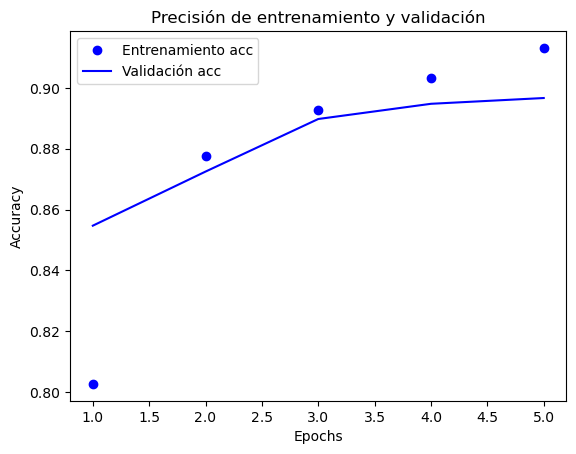

In [ ]:
# Visualizar la precisión de entrenamiento y validación a lo largo del tiempo
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.plot(epochs, val_acc, 'b', label='Validación acc')
plt.title('Precisión de entrenamiento y validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

El gráfico ayuda a comprender cómo cambia la precisión del modelo durante el proceso de entrenamiento y si hay signos de sobreajuste (overfitting) o subajuste (underfitting). Si la precisión en el conjunto de entrenamiento es mucho mayor que en el conjunto de validación, podría indicar que el modelo está sobreajustando los datos de entrenamiento. Si la precisión en el conjunto de validación es baja y no mejora significativamente con el tiempo, podría indicar subajuste. Si ambas líneas aumentan y se mantienen cercanas entre sí, indica que el modelo está generalizando bien.

Por tal motivo las lineas tanto de validacion y entrenamiento se encuentran muy cercanas entre ellas, lo que significaria que el modelo estaría bien.

In [ ]:
# Elaborar matrices de confusion

import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predecir las etiquetas para los conjuntos de entrenamiento y prueba
y_train_pred = np.argmax(model.predict(train_images), axis=-1)
y_test_pred = np.argmax(model.predict(test_images), axis=-1)


313/313 [==============================] - 2s 5ms/step


In [ ]:
# Crear las matrices de confusión
train_conf_matrix = confusion_matrix(train_labels, y_train_pred)
test_conf_matrix = confusion_matrix(test_labels, y_test_pred)


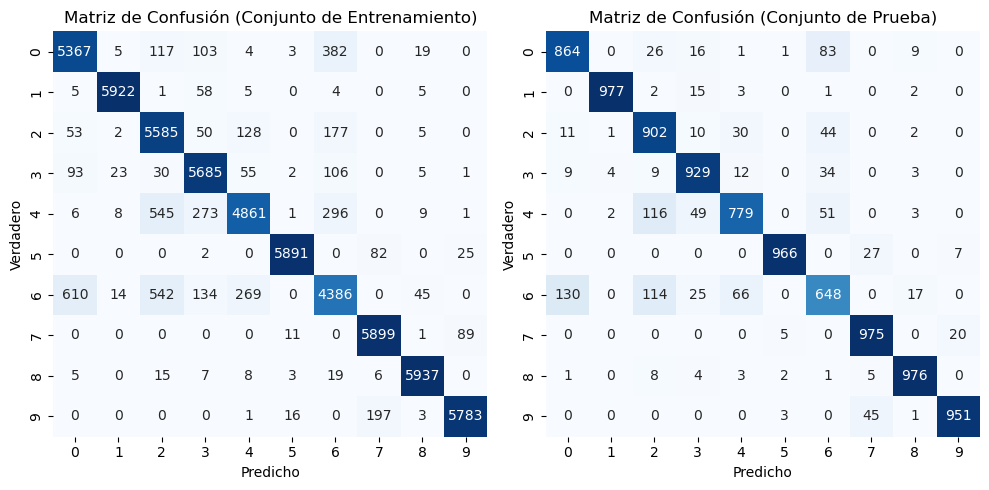

In [ ]:
# Visualizar las matrices de confusión
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión (Conjunto de Entrenamiento)")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión (Conjunto de Prueba)")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")

plt.tight_layout()
plt.show()

La matriz de confusión muestran cuántas imágenes de cada clase se clasificaron correctamente y cuántas se clasificaron incorrectamente.

-True Positive (TP): El modelo predijo correctamente que las instancias pertenecen a la clase positiva.

-True Negative (TN): El modelo predijo correctamente que las instancias no pertenecen a la clase positiva.

-False Positive (FP): El modelo predijo incorrectamente que las instancias pertenecen a la clase positiva (falso positivo).

-False Negative (FN): El modelo predijo incorrectamente que las instancias no pertenecen a la clase positiva (falso negativo).



Para la clase 0 de la matriz de confusion conjunto de Prueba el modelo predijo correctamente 864 instancias (TP).
Para la clase 1, el modelo predijo correctamente 977 instancias (TP).
